In [25]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, EarlyStopping
import sys
sys.path.append('../')
from noise_models.PixelCNN_signaldependent import PixelCNN
from utils.dataloaders_signaldependent import create_nm_loader
from torchvision import transforms

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
flower = imread('../data/flower.tif')

In [28]:
observation = flower[:,np.newaxis].astype(float)

In [29]:
signal = np.repeat(np.mean(observation, axis=0, keepdims=True), repeats=observation.shape[0], axis=0)

In [30]:
noise = observation - signal

In [31]:
transform = transforms.RandomCrop(64)
train_loader, val_loader, n_mean, n_std, s_mean, s_std = create_nm_loader(observation, signal, transform, 0.8, 8)

In [32]:
checkpoint_path = '../nm_checkpoint/Convallaria/signal_dependent'
trainer = pl.Trainer(default_root_dir=os.path.join(checkpoint_path, "PixelCNN"),
                     gpus=1 if str(device).startswith("cuda") else 0,
                     max_epochs=100,
                     callbacks=[ModelCheckpoint(save_weights_only=False, mode="min", monitor="val_nll"),
                                LearningRateMonitor("epoch"),
                                EarlyStopping('val_nll', patience=100)])

model = PixelCNN(kernel_size = 7,
                 depth = 5, num_filters = 128,
                 num_gaussians = 10,
                 n_mean=n_mean,
                 n_std=n_std,
                 s_mean=s_mean,
                 s_std=s_std).to(device)

trainer.fit(model, train_loader, val_loader)
trainer.save_checkpoint('../nm_checkpoint/Convallaria/signal_dependent/final_params.ckpt')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

  | Name       | Type                       | Params
----------------------------------------------------------
0 | v_inconv   | VerticalStackConvolution   | 6.4 K 
1 | h_inconv   | HorizontalStackConvolution | 1.0 K 
2 | gatedconvs | ModuleList                 | 2.0 M 
3 | s_inconv   | Conv2d                     | 256   
4 | outconv    | Conv2d                     | 3.9 K 
----------------------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.982     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/rds/bear-apps/2021a/EL8-has/software/pytorch-lightning/1.5.7-foss-2021a-CUDA-11.3.1/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/rds/bear-apps/2021a/EL8-has/software/pytorch-lightning/1.5.7-foss-2021a-CUDA-11.3.1/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/rds/bear-apps/2021a/EL8-has/software/pytorch-lightning/1.5.7-foss-2021a-CUDA-11.3.1/lib/python3.9/site-packages/pyt

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [33]:
import warnings
warnings.filterwarnings('ignore')
import os
import torch
from torchvision import transforms
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
import sys
sys.path.append('../')
from HDN.models.lvae import LadderVAE
from utils.dataloaders import create_dn_loader
from tifffile import imread
from noise_models.PixelCNN_signaldependent import PixelCNN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [100]:
flower = imread('../data/flower.tif')

observation = flower[:,np.newaxis].astype(float)

transform = transforms.RandomCrop(64)
train_loader, val_loader, data_mean, data_std, img_shape = create_dn_loader(observation, transform, 0.8, 8)

In [35]:
noiseModel = PixelCNN.load_from_checkpoint('../nm_checkpoint/Convallaria/signal_dependent/final_params.ckpt').to(device).eval()
for param in noiseModel.parameters():
    param.requires_grad = False

In [36]:
lr=3e-4
num_latents = 3
z_dims = [32]*int(num_latents)
free_bits = 0.5

model = LadderVAE(z_dims=z_dims,
                   data_mean=data_mean,
                   data_std=data_std,
                   noiseModel=noiseModel,
                   img_shape=img_shape,
                   img_folder='../dn_checkpoint/Convallaria/signal_dependent/imgs').to(device)

checkpoint_path = '../dn_checkpoint/Convallaria/signal_dependent'
trainer = pl.Trainer(default_root_dir=os.path.join(checkpoint_path, "HDN"),
                     gpus=1 if str(device).startswith("cuda") else 0,
                     max_epochs=100,
                     logger=False,
                     gradient_clip_val=0,
                     callbacks=[ModelCheckpoint(save_weights_only=False, mode="min", monitor="val_elbo", every_n_epochs=50),
                                EarlyStopping('val_elbo', patience=100)])

trainer.fit(model, train_loader, val_loader)
trainer.save_checkpoint('../dn_checkpoint/Convallaria/signal_dependent/final_params.ckpt')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

  | Name             | Type                 | Params
----------------------------------------------------------
0 | first_bottom_up  | Sequential           | 75.8 K
1 | top_down_layers  | ModuleList           | 2.0 M 
2 | bottom_up_layers | ModuleList           | 1.3 M 
3 | final_top_down   | Sequential           | 412 K 
4 | likelihood       | NoiseModelLikelihood | 2.0 M 
----------------------------------------------------------
3.8 M     Trainable params
2.0 M     Non-trainable params
5.8 M     Total params
23.142    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch    25: reducing learning rate of group 0 to 1.5000e-04.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch    36: reducing learning rate of group 0 to 7.5000e-05.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch    47: reducing learning rate of group 0 to 3.7500e-05.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch    58: reducing learning rate of group 0 to 1.8750e-05.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch    69: reducing learning rate of group 0 to 9.3750e-06.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch    80: reducing learning rate of group 0 to 4.6875e-06.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch    91: reducing learning rate of group 0 to 2.3437e-06.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [109]:
signal = np.mean(observation, axis=0, keepdims=True)

In [116]:
observation_cropped = torch.from_numpy(observation[:1,:1,500:564,500:564]).type(torch.FloatTensor)
signal_cropped = signal[:1,:1,500:564,500:564]

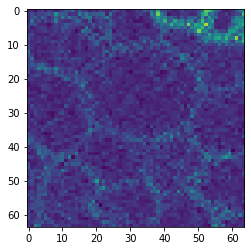

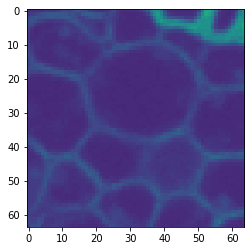

In [117]:
plt.imshow(observation_cropped[0,0], vmin=vmin, vmax=vmax)
plt.show()
plt.imshow(signal_cropped[0,0], vmin=vmin, vmax=vmax)

In [118]:
model = LadderVAE.load_from_checkpoint('../dn_checkpoint/Convallaria/signal_dependent/final_params.ckpt').to(device)
from utils import predict_and_save
predict_and_save.predict_and_save(model, observation_cropped, '../results/Convallaria/signal_dependent', 100)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.24s/it]


In [119]:
result = imread('../results/Convallaria/signal_dependent/mmse.tif')

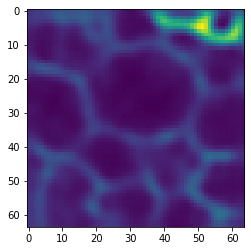

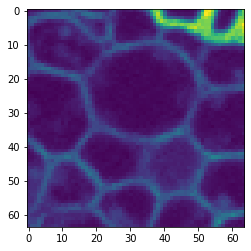

In [121]:
plt.imshow(result[0,0])
plt.show()
plt.imshow(signal_cropped[0,0])

In [122]:
import numpy as np
from tifffile import imread

def PSNR(gt, img, psnrRange):
    '''
    Compute PSNR.
    Parameters
    ----------
    gt: array
        Ground truth image.
    img: array
        Predicted image.
    psnrRange: float
        Range PSNR
    '''
    mse = np.mean(np.square(gt - img))
    return 20 * np.log10(psnrRange) - 10 * np.log10(mse)

result = imread('../results/Convallaria/signal_dependent/mmse.tif')

psnr = np.array([])
for i in range(result.shape[0]):
    range_psnr = np.max(signal_cropped[i])-np.min(signal_cropped[i])
    psnr = np.append(psnr, PSNR(signal_cropped[i], result[i], range_psnr))

print(np.mean(psnr))

23.95255623852362


In [123]:
1000/60

16.666666666666668